In [395]:
import scipy.io as sio
from buildingspy.io.outputfile import Reader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
tsubmin, tsubmax = 20, 30

In [2]:
def extract_results(varname, reader):
    return reader.values(varname)

In [231]:
def time_range(var, t, t_min, t_max):
    indices = np.where(np.logical_and(t >= t_min, t <= t_max))
    return t[indices], var[indices]

In [157]:
def myfft(signal):
    """Works for even n, not for odd n, see myfft2 below"""
    n = len(signal) - 1
    h = 2 * np.pi / (n+1)
    
    mu = n % 2
    M = int((n - mu) / 2)
    
    coefs = np.zeros(n+1, dtype=complex)
    indices = np.arange(0, n + 1) # 0 to n
    for i in indices:
        #                   don't take indices-1 or i-1 since begin with 0
        val = ( np.dot(np.exp(-1j * (indices) * (i - M) * h), signal) ) / (n+1)
        coefs[i+mu] = val
    
    if mu == 1:
        val = 1 / ( 2*(n + 1) ) * np.power(-1, indices) * signal
        coefs[0] = val
        coefs[-1] = val
        
    if mu == 0:
        midindex = int(np.ceil((n+1)/2)) - 1 # -1 since begin with 0
        aks = np.zeros(M+1, dtype=complex)
        bks = np.zeros(M+1, dtype=complex)
        #aks[0] = coefs[midindex] * 2
        #bks[0] = 0
        for i in range(0, M+1): # 0 to M
            aks[i] = coefs[midindex - i] + coefs[midindex + i]
            bks[i] = 1j * (coefs[midindex + i] - coefs[midindex - i])
            #bks[i+1] = (coefs[midindex + i] - coefs[midindex - i])
    else:
        midindex = int(ceil((n+2)/2)) - 1 # -1 since begin with 0
        aks = np.zeros(M+2)
        bks = np.zeros(M+2)
        aks[0] = coefs[midindex] * 2
        bks[0] = 0
        for i in range(1, M):
            aks[i] = coefs[midindex-i] + coefs[midindex+i]
            #bks[i] = 1j * (coefs[midindex+i] - coefs[midindex-i])
            bks[i] = (coefs[midindex+i] - coefs[midindex-i])
        aks[-1] = 2 * coefs[-1]
        bks[-1] = 0
    
    isimag = False
    for ak in aks:
        if np.imag(ak) != 0.0:
            isimag = True
            break
    for bk in bks:
        if np.imag(bk) != 0.0:
            isimag = True
            break
    if isimag:
        raise Exception("myyft: some aks, bks are imaginary")
    
    return coefs, np.real(aks), np.real(bks)

In [10]:
np.power(-1, np.arange(0,3))

array([ 1, -1,  1])

In [238]:
def myfft2(signal):
    n = len(signal) - 1
    h = 2 * np.pi / (n+1)
    
    mu = n % 2
    M = int((n - mu) / 2)
    
    coefs = np.zeros(n+1, dtype=complex)
    indices = np.arange(0, n + 1) # 0 to n

    
    if mu == 1:
        coefs = np.zeros(n+2, dtype=complex)
        for i in indices:
            #                   don't take indices-1 or i-1 since begin with 0
            val = ( np.dot(np.exp(-1j * (indices) * (i - M) * h), signal) ) / (n+1)
            coefs[i+mu] = val
        
        val = 1 / ( 2*(n + 1) ) * np.dot(np.power(-1, indices), signal)
        coefs[0] = val
        coefs[-1] = val
    else:
        for i in indices:
            #                   don't take indices-1 or i-1 since begin with 0
            val = ( np.dot(np.exp(-1j * (indices) * (i - M) * h), signal) ) / (n+1)
            coefs[i+mu] = val
        
    if mu == 0:
        midindex = int(np.ceil((n+1)/2)) - 1 # -1 since begin with 0
        aks = np.zeros(M+1, dtype=complex)
        bks = np.zeros(M+1, dtype=complex)
        #aks[0] = coefs[midindex] * 2
        #bks[0] = 0
        for i in range(0, M+1): # 0 to M
            aks[i] = coefs[midindex - i] + coefs[midindex + i]
            bks[i] = 1j * (coefs[midindex + i] - coefs[midindex - i])
            #bks[i+1] = (coefs[midindex + i] - coefs[midindex - i])
    else:
        midindex = int(np.ceil((n+2)/2)) - 1 # -1 since begin with 0
        aks = np.zeros(M+2, dtype=complex)
        bks = np.zeros(M+2, dtype=complex)
        aks[0] = coefs[midindex] * 2
        bks[0] = 0
        for i in range(0, M+1):
            aks[i] = coefs[midindex-i] + coefs[midindex+i]
            #bks[i] = 1j * (coefs[midindex+i] - coefs[midindex-i])
            bks[i] = 1j * (coefs[midindex+i] - coefs[midindex-i])
        aks[-1] = 2 * coefs[-1]
        bks[-1] = 0
    
    isimag = False
    for ak in aks:
        if np.imag(ak) != 0.0:
            isimag = True
            break
    for bk in bks:
        if np.imag(bk) != 0.0:
            isimag = True
            break
    if isimag:
        raise Exception("myyft: some aks, bks are imaginary")
    
    return coefs, np.real(aks), np.real(bks)

In [278]:
y, aks, bks, T, t, signal = perform_fft(signalref, tref, dtref)

[20.   20.   20.15 20.15]


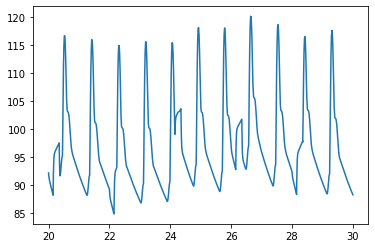

In [276]:
plt.plot(tref,signalref)

In [286]:
get_constant_time_steps(tref, dtref)

(array([ 0,  1, 12, 13]),)

In [285]:
tref[:20]

array([20.   , 20.   , 20.01 , 20.025, 20.04 , 20.055, 20.07 , 20.085,
       20.1  , 20.115, 20.13 , 20.145, 20.15 , 20.15 , 20.15 , 20.15 ,
       20.16 , 20.175, 20.19 , 20.205])

# Test `myfft`

## Even number of points

In [18]:
n = 26
T = 2.4 * np.pi
t = T / (n+1) * np.arange(0, n + 1) # 0 to n
signal = t * (t - 2 * np.pi) * np.exp(-t)

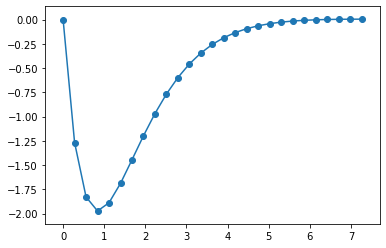

In [89]:
plt.plot(t, signal);
plt.scatter(t, signal);

In [35]:
np.ones((10,1)) * (np.ones((10,1)).transpose())

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [37]:
np.matmul(np.ones((10,1)), np.ones((10,1)).transpose())

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [46]:
a1 = np.ones(10)
a2 = np.arange(1, 11, dtype=float)
a1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [47]:
a2

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [48]:
np.dot(a1,a2)

55.0

In [158]:
y, aks, bks = myfft(signal)
aks

array([-1.12841985, -0.2857474 ,  0.14599626,  0.15256132,  0.11627542,
        0.08783852,  0.06863283,  0.05576007,  0.04700551,  0.04098257,
        0.03684741,  0.03408633,  0.0323897 ,  0.0315814 ])

In [159]:
bks

array([ 0.00000000e+00, -7.59368382e-01, -3.86330629e-01, -1.70150861e-01,
       -8.38689356e-02, -4.61686744e-02, -2.76352350e-02, -1.75588380e-02,
       -1.16025052e-02, -7.81656880e-03, -5.24078929e-03, -3.36164895e-03,
       -1.88060688e-03, -6.05602445e-04])

In [186]:
x = t * 0 + aks[0] / 2
for k in range(1, len(aks)):
    x += aks[k] * np.cos(2*np.pi*t * k / T) + \
         bks[k] * np.sin(2*np.pi*t * k / T)

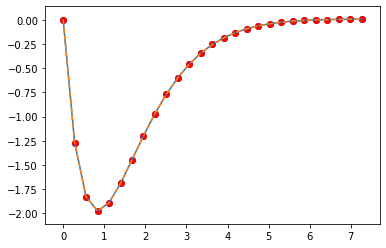

In [194]:
plt.plot(t, x)
plt.scatter(t, x);
plt.scatter(t, signal, color='red');
plt.plot(t, signal, '--');

## Odd number of points

In [216]:
n = 26
T = 2.4 * np.pi
t = T / (n+1) * np.arange(0, n + 1) # 0 to n
signal = t * (t - 2 * np.pi) * np.exp(-t)

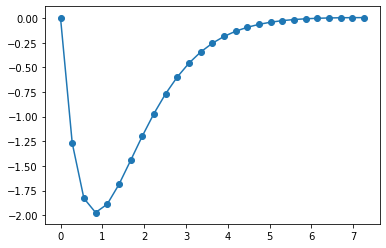

In [217]:
plt.scatter(t, signal)
plt.plot(t, signal);

In [219]:
y, aks, bks = myfft2(signal)
aks

array([-1.12841985, -0.2857474 ,  0.14599626,  0.15256132,  0.11627542,
        0.08783852,  0.06863283,  0.05576007,  0.04700551,  0.04098257,
        0.03684741,  0.03408633,  0.0323897 ,  0.0315814 ])

In [220]:
bks

array([ 0.00000000e+00, -7.59368382e-01, -3.86330629e-01, -1.70150861e-01,
       -8.38689356e-02, -4.61686744e-02, -2.76352350e-02, -1.75588380e-02,
       -1.16025052e-02, -7.81656880e-03, -5.24078929e-03, -3.36164895e-03,
       -1.88060688e-03, -6.05602445e-04])

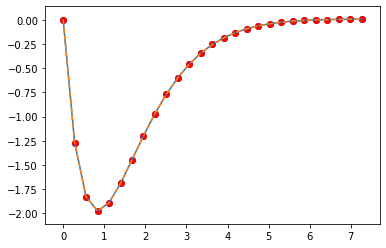

In [221]:
x = t * 0 + aks[0] / 2
for k in range(1, len(aks)):
    x += aks[k] * np.cos(2*np.pi*t * k / T) + \
         bks[k] * np.sin(2*np.pi*t * k / T)

plt.plot(t, x)
plt.scatter(t, x);
plt.scatter(t, signal, color='red');
plt.plot(t, signal, '--');

In [222]:
def reconstruct(aks, bks, t, T):
    x = t * 0 + aks[0] / 2
    for k in range(1, len(aks)):
        x += aks[k] * np.cos(2*np.pi*t * k / T) + \
             bks[k] * np.sin(2*np.pi*t * k / T)
    return x

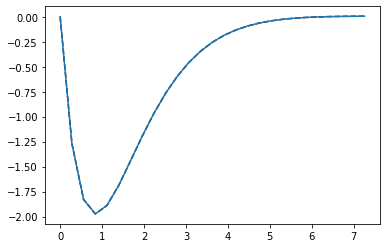

In [224]:
plt.plot(t, signal, '--k')
plt.plot(t, reconstruct(aks, bks, t, T));

# `performfft`



In [295]:
def perform_fft(signal, t, dt):
    """Equivalent of performmyfftonsignal"""
    
    t, indices = np.unique(t, return_index=True)
    signal = signal[indices]
    
    indices = get_constant_time_steps(t, dt)
    t = t[indices]
    signal = signal[indices]
    
    
    tmin, tmax = t[0], t[-1]
    T = tmax - tmin
    
    t = t[:-1]
    signal = signal[:-1]
    y, aks, bks =  myfft2(signal)
    return y, aks, bks, T, t, signal

In [8]:
def get_constant_time_steps(t, dt):
    """Different from .m script: does not return the time"""
    tcopy = t - t[0]
    return np.where(np.abs(tcopy / dt - np.round(tcopy / dt)) < 1e-12)

In [296]:
reader = Reader('../Pre-processing/model_file_1.mat', 'dymola')
tsubmin, tsubmax = 10, 20

In [297]:
t, signal = extract_results('SystemicArteries.PC', reader)

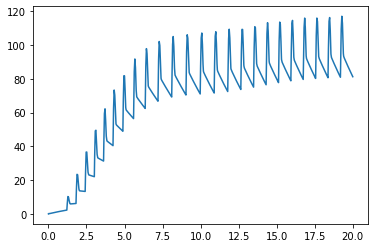

In [298]:
plt.plot(t, signal);

In [299]:
t, signal = time_range(signal, t, tsubmin, tsubmax)

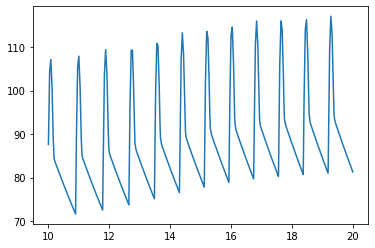

In [300]:
plt.plot(t, signal);

In [301]:
y, aks, bks, T, t, signal = perform_fft(signal, t, 0.04)

In [302]:
signal_tilda = reconstruct(aks, bks, t, T)

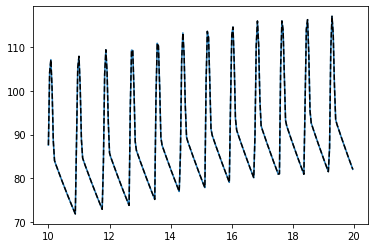

In [245]:
plt.plot(t, signal_tilda);
plt.plot(t, signal, '--k');

# Test on file with another time discretization

In [361]:
reader = Reader('../Pre-processing/model_file_2.mat', 'dymola')
tsubmin, tsubmax = 20, 30
dt = 0.015

In [362]:
t, signal = extract_results('SystemicArteries.PC', reader)

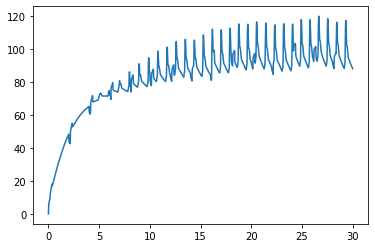

In [363]:
plt.plot(t, signal);

In [364]:
t, signal = time_range(signal, t, tsubmin, tsubmax)

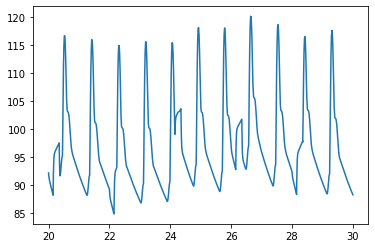

In [365]:
plt.plot(t, signal);

In [366]:
len(t)

1115

In [367]:
tu, idx = np.unique(t, return_index=True)

In [368]:
su = signal[idx]

In [376]:
len(tu)

889

In [389]:
def get_constant_time_steps(t, dt):
    """Different from .m script: """
    return np.arange(t[0], t[-1] + dt, step=dt)

In [390]:
newt = get_constant_time_steps(tu, dt)

In [392]:
len(newt)

668

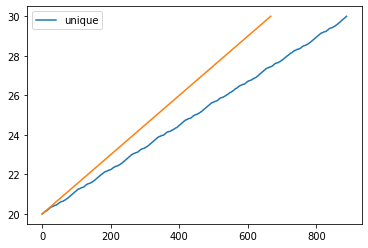

In [391]:
plt.plot(range(0, len(tu)), tu, label='unique');
plt.plot(range(0, len(newt)), newt)
plt.legend();

In [393]:
tu

array([20.        , 20.01      , 20.025     , 20.04      , 20.055     ,
       20.07      , 20.085     , 20.1       , 20.115     , 20.13      ,
       20.145     , 20.15      , 20.15      , 20.16      , 20.175     ,
       20.19      , 20.205     , 20.22      , 20.235     , 20.25      ,
       20.265     , 20.28      , 20.295     , 20.31      , 20.325     ,
       20.34      , 20.35      , 20.35366154, 20.355     , 20.37      ,
       20.37801956, 20.38041774, 20.385     , 20.39964547, 20.4       ,
       20.415     , 20.42872843, 20.43      , 20.43479882, 20.44071283,
       20.445     , 20.44587054, 20.45539465, 20.46      , 20.475     ,
       20.49      , 20.505     , 20.52      , 20.535     , 20.55      ,
       20.565     , 20.58      , 20.58863881, 20.595     , 20.61      ,
       20.61371671, 20.62293416, 20.625     , 20.63248884, 20.63631605,
       20.64      , 20.64155222, 20.655     , 20.67      , 20.68030676,
       20.685     , 20.7       , 20.70534105, 20.715     , 20.73

## Try resampling feature of pandas

In [398]:
len(newt)

668

In [399]:
len(tu)

889

In [400]:
len(su)

889

In [411]:
df= pd.DataFrame(index=tu)

In [413]:
df['sig'] = su

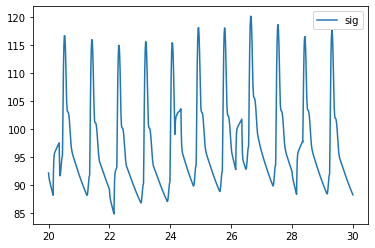

In [415]:
df.plot()

In [419]:
tu[1]

20.01

In [422]:
df.index = pd.to_datetime(tu * 1e9) # convert to nanosecond

In [423]:
df

,sig
1970-01-01 00:00:20.000,92.128525
1970-01-01 00:00:20.010,91.540666
1970-01-01 00:00:20.025,90.969677
1970-01-01 00:00:20.040,90.575631
1970-01-01 00:00:20.055,90.228934
...,...
1970-01-01 00:00:29.940,89.006279
1970-01-01 00:00:29.955,88.806696
1970-01-01 00:00:29.970,88.609705
1970-01-01 00:00:29.985,88.415280


In [429]:
df.resample('15ms').mean()

,sig
1970-01-01 00:00:19.995,92.128525
1970-01-01 00:00:20.010,91.540666
1970-01-01 00:00:20.025,90.969677
1970-01-01 00:00:20.040,90.575631
1970-01-01 00:00:20.055,90.228934
...,...
1970-01-01 00:00:29.940,89.006279
1970-01-01 00:00:29.955,88.806696
1970-01-01 00:00:29.970,88.609705
1970-01-01 00:00:29.985,88.415280


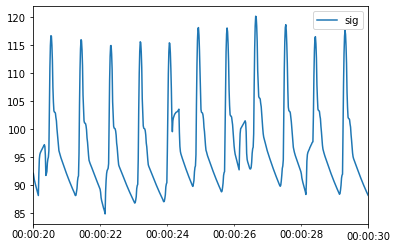

In [430]:
df.resample('15ms').mean().plot()

In [444]:
df = df.resample('15ms').mean()

In [454]:
(df.index - df.index[0]).microseconds * 1e-6

Float64Index([                0.0,               0.015,                0.03,
                            0.045,                0.06,               0.075,
                             0.09,               0.105,                0.12,
              0.13499999999999998,
              ...
                             0.87,               0.885,  0.8999999999999999,
               0.9149999999999999,  0.9299999999999999,               0.945,
                             0.96,               0.975,                0.99,
                            0.005],
             dtype='float64', length=668)

In [511]:
def get_constant_time_steps(t, signal, dt):
    """t in seconds, dt in seconds"""
    df = pd.DataFrame(index = pd.to_datetime(t * 1e9)) # to nanosecond
    df['signal'] = signal
    df = df.resample('{}ms'.format(dt*1000)).mean()
    df.index -= df.index[0]
    newtime = df.index.microseconds * 1e-6 + df.index.seconds
    return newtime.values, df['signal'].values

In [503]:
reader = Reader('../Pre-processing/model_file_2.mat', 'dymola')
tsubmin, tsubmax = 20, 30
dt = 0.015

In [504]:
t, signal = extract_results('SystemicArteries.PC', reader)

In [505]:
t, idx = np.unique(t, return_index=True)
signal = signal[idx]

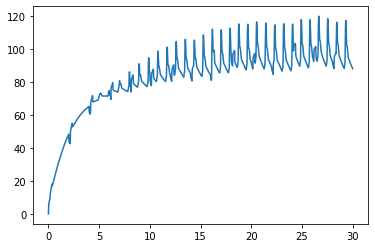

In [506]:
plt.plot(t, signal)

In [507]:
t, signal = time_range(signal, t, tsubmin, tsubmax)

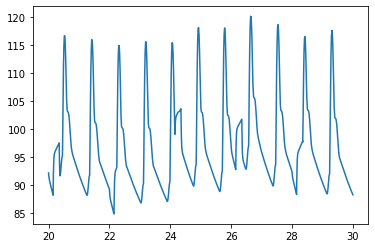

In [508]:
plt.plot(t, signal)

In [512]:
t_, signal_ = get_constant_time_steps(t, signal, dt)

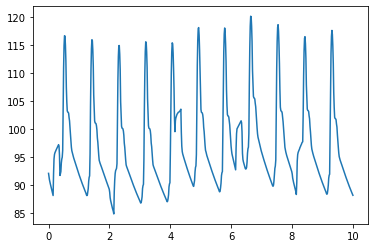

In [513]:
plt.plot(t_, signal_)

In [514]:
len(t)

889

In [515]:
len(t_)

668

# Final perform fft

In [521]:
def perform_fft(signal, t, dt):
    """Equivalent of performmyfftonsignal"""
    
    t, indices = np.unique(t, return_index=True)
    signal = signal[indices]
    
    t, signal = get_constant_time_steps(t, signal, dt)
    
    tmin, tmax = t[0], t[-1]
    T = tmax - tmin
    
    t = t[:-1]
    signal = signal[:-1]
    y, aks, bks =  myfft2(signal)
    return y, aks, bks, T, t, signal

In [522]:
reader = Reader('../Pre-processing/model_file_2.mat', 'dymola')
tsubmin, tsubmax = 20, 30
dt = 0.015

t, signal = extract_results('SystemicArteries.PC', reader)
t, signal = time_range(signal, t, tsubmin, tsubmax)

In [523]:
y, aks, bks, T, t, signal = perform_fft(signal, t, dt)

In [526]:
x = reconstruct(aks, bks, t, T)

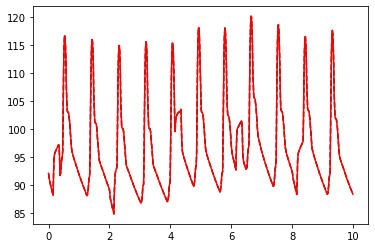

In [527]:
plt.plot(t, signal, '--k');
plt.plot(t, x, 'r');

In [535]:
np.where(bks > 1e-15)

(array([  2,   3,   5,   7,   8,  10,  12,  13,  15,  16,  23,  26,  27,
         28,  29,  35,  37,  38,  39,  40,  41,  42,  43,  44,  45,  47,
         49,  52,  56,  57,  59,  60,  61,  64,  65,  66,  67,  68,  70,
         73,  79,  80,  82,  84,  86,  88,  92,  94,  97,  98,  99, 100,
        101, 102, 103, 105, 106, 107, 108, 109, 111, 115, 117, 119, 120,
        122, 123, 124, 125, 127, 129, 130, 131, 132, 135, 136, 143, 144,
        146, 147, 148, 150, 152, 153, 159, 162, 164, 166, 167, 168, 171,
        172, 173, 175, 177, 178, 180, 182, 183, 185, 187, 189, 190, 191,
        194, 195, 197, 199, 201, 202, 203, 205, 208, 210, 211, 212, 213,
        214, 217, 222, 226, 227, 229, 230, 232, 233, 234, 235, 236, 238,
        239, 240, 243, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258,
        260, 261, 265, 269, 270, 273, 274, 276, 278, 279, 281, 282, 288,
        289, 290, 292, 293, 294, 301, 302, 304, 306, 307, 308, 310, 313,
        315, 316, 317, 319, 320, 321, 322, 323, 325